<a href="https://colab.research.google.com/github/shubhamojha1/OCR-project/blob/main/digit_detection_webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")


11501568/11490434 [==============================] - 0s 0us/step


In [6]:
from sklearn.model_selection import train_test_split

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train,test_size=0.2)

In [8]:
x_validation.shape, y_validation.shape

((12000, 28, 28, 1), (12000,))

In [9]:
x_train.shape, x_test.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

## Plotting a bar graph to show distribution of data

In [17]:
# len(np.where(y_train==0)[0])
sum = 0
numOfSamples = []
for x in range(10):
  # print(x,"-",len(np.where(y_train==x)[0]))
  numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

[4721, 5373, 4782, 4897, 4647, 4370, 4742, 5021, 4690, 4757]


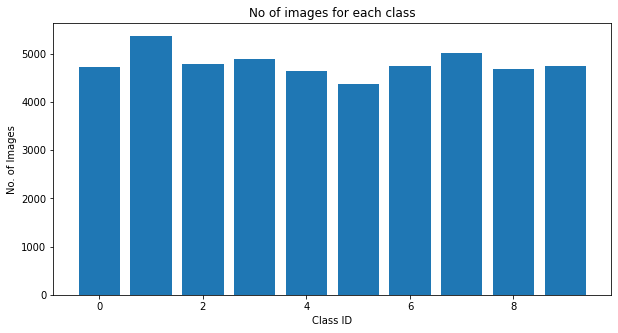

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(0,10), numOfSamples)
plt.title("No of images for each class")
plt.xlabel("Class ID")
plt.ylabel("No. of Images")
plt.show()

## Preprocessing 
augmenting, zoom, rotation, translation
to make data more generic and better at predictions

In [25]:
# def preProcessing(img):
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   img = cv2.equalizeHist(img)
#   img = img/255
#   return img

In [ ]:

# img = preProcessing(x_train[30])
# img = cv2.resize(img, (300, 300))
# cv2_imshow(img)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  90680      0 --:--:-- --:--:-- --:--:-- 90680


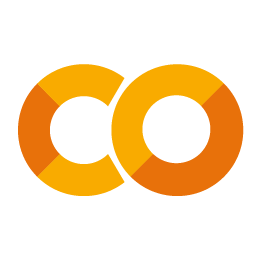

In [27]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(x_train)
# One hot encoding time
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)
y_test = to_categorical(y_test, 10)

In [35]:
def myModel():
  noOfFilters = 60
  sizeOfFilter1 = (5,5)
  sizeOfFilter2 = (3,3)
  sizeOfPool = (2,2)
  noOfNodes = 500

  model = Sequential()
  model.add((Conv2D(noOfFilters,
                    sizeOfFilter1,
                    input_shape = (28,28,1),
                    activation = 'relu')))
  model.add((Conv2D(noOfFilters,
                    sizeOfFilter1,
                    activation = 'relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add((Conv2D(noOfFilters//2,
                    sizeOfFilter2,
                    activation = 'relu')))
  model.add((Conv2D(noOfFilters//2,
                    sizeOfFilter2,
                    activation = 'relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))

  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(noOfNodes, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model

In [36]:
model = myModel()

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 30)          16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 30)         0         
 2D)                                                  

In [42]:
batch_size = 50
epochs = 10
steps_per_epoch = 800

history = model.fit_generator(dataGen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=(x_validation, y_validation),
                    shuffle=True)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


800/800 [==============================] - 304s 381ms/step - loss: 0.1979 - accuracy: 0.9400 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 2/10
800/800 [==============================] - 300s 375ms/step - loss: 0.1530 - accuracy: 0.9552 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 3/10
800/800 [==============================] - 302s 377ms/step - loss: 0.1284 - accuracy: 0.9614 - val_loss: 0.0469 - val_accuracy: 0.9868
Epoch 4/10
800/800 [==============================] - 307s 384ms/step - loss: 0.1144 - accuracy: 0.9656 - val_loss: 0.0413 - val_accuracy: 0.9901
Epoch 5/10
800/800 [==============================] - 303s 379ms/step - loss: 0.1058 - accuracy: 0.9684 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 6/10
800/800 [==============================] - 301s 376ms/step - loss: 0.0954 - accuracy: 0.9723 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 7/10
800/800 [==============================] - 304s 380ms/step - loss: 0.0934 - accuracy: 0.9724 - val_loss: 0.0362 - val_accura

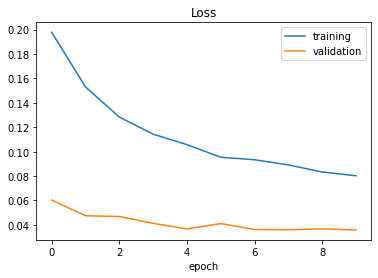

In [43]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

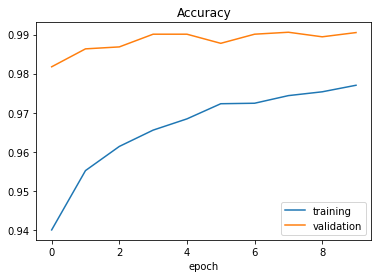

In [44]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)

In [46]:
# print("Test Score: ",score)
score

[0.023894354701042175, 0.9932000041007996]

In [47]:
print("Test Score: ",score[0])
print("Test Accuracy: ",score[1])

Test Score:  0.023894354701042175
Test Accuracy:  0.9932000041007996


In [48]:
import pickle

pickle_out = open("model_trained.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://1a253522-5215-4c29-8547-997822c6933d/assets


In [58]:
import numpy as np
import cv2
import pickle


width = 640
height = 480

cap = cv2.VideoCapture(1)
cap.set(3, width)
cap.set(4, height)
threshold = 0.5

pickle_in = open("model_trained.p", "rb")
model = pickle.load(pickle_in)

while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    print(img)
    # img = img[:,:,0]
    # img = cv2.resize(img, (28, 28))
    # cv2.imshow("Processed Image", img)
    # img = img.reshape(1,28, 28, 1)
    # Predict
    classIndex = int(model.predict(img))
    # print(classIndex)
    predictions = model.predict(img)
    # print(predictions)
    prob_val = np.amax(predictions)
    print(classIndex, prob_val)

    if prob_val > threshold:
        cv2.putText(imgOriginal,
        str(classIndex) +" "+str(prob_val),
        (50, 50),
        cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)

    cv2.imshow("Original Image", imgOriginal)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

None


ValueError: ignored